In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import statsmodels.api as sm
from scipy.stats import norm, uniform, expon, t, kstest, shapiro, wilcoxon, ttest_1samp, ttest_rel, mannwhitneyu
import ipywidgets as widgets
from IPython.display import display

## 1) Is there a difference between number of goals scored at home matches and away matches? ##

- H0: there is no difference between goals scored at home games and away games
- H1: there is a difference between goals scored at home games and away games

$$H_0: u_{\text{home}} = u_{\text{away}} \quad\text{vs}\quad H_1: u_{\text{home }} \neq u_{\text{away}}$$

Two types of tests are performed:
   - First we perform a visual normality test, and a statistical one, using Kolmogorov-Smirnov test since we have a big dataset (otherwise Saphiro test would be used).
   - If the result is that we do not have normally distributed data, we use Wilcoxon test to determine wether there is a significant difference between both groups. Finally by looking at the result we know which one is higher. 
   





In [55]:
def normality_test(x, bins = 20):
        
    mu = np.mean(x)
    sigma = np.std(x, ddof = 1) # unbiased std

    plt.figure(figsize = (15,4))

    ax1 = plt.subplot(1,3,1)
    ax1.hist(x,bins=bins, density = True)
    x_axis = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
    ax1.plot(x_axis,norm.pdf(x_axis, mu, sigma),'r',linewidth=2)
    ax1.set_title('Normalized histogram')
    
    ax2 = plt.subplot(1,3,2)
    ax2.boxplot(x)
    ax2.set_title('Boxplot')
    
    ax3 = plt.subplot(1,3,3)
    sm.qqplot(x, line='s', ax=ax3)
    ax3.set_title('QQ Plot')

    plt.show()

    if x.shape[0] > 50:
        ks_statistic, p_value = kstest(x,'norm', args=(x.mean(), x.std()) )
        print('KS Statistic:', ks_statistic, '\t p-value:', p_value)
    else:
        sw_statistic, p_value = shapiro(x)
        print('SW Statistic:', sw_statistic, '\t p-value:', p_value)
    if p_value > 0.05: 
        print('Looks like a normal distribution.')
    else:
        print('Does not look like a normal distribution.')
        
def inference(hg, vg):
    print("Home goals normality test:")
    normality_test(hg)
    
    print("Visitant goals normality test:")
    normality_test(vg)
    hg_mean = hg.mean()
    vg_mean = vg.mean()
        
    result, p_value = wilcoxon(hg,vg)
    
    if p_value < 0.05:
        print("There is a significant difference between the home goals and the away goals.")
        print("P-value:",p_value, "Wilcoxon test:", result)
    

        if hg_mean > vg_mean:
            print("Teams score more goals at home matches.")
            
        elif hg_mean < vg_mean:
            print("Teams score more goals at away matches.")
    
    else:
        print("There is no significant difference between home goals and away goals.")
        print("P-value:",p_value, "Wilcoxon test:", result)
        
    name = ['Home Goals Mean', 'Visitant Goals Mean']
    value = [hg_mean, vg_mean]
    
    # Crear el histograma
    plt.figure(figsize=(6, 2))
    bars = plt.barh(name, value, color=['blue', 'red'])
    
    # Agregar etiquetas y título
    plt.xlabel('Mean Goals')
    plt.title('Mean Scored Goals by Team')
    plt.xlim(0, max(value) * 1.2)

    for bar in bars:
        value = bar.get_width()
        plt.text(value, bar.get_y() + bar.get_height()/2, f'{value:.2f}', va='center')

    
    # Mostrar el histograma
    plt.show()


Home goals normality test:


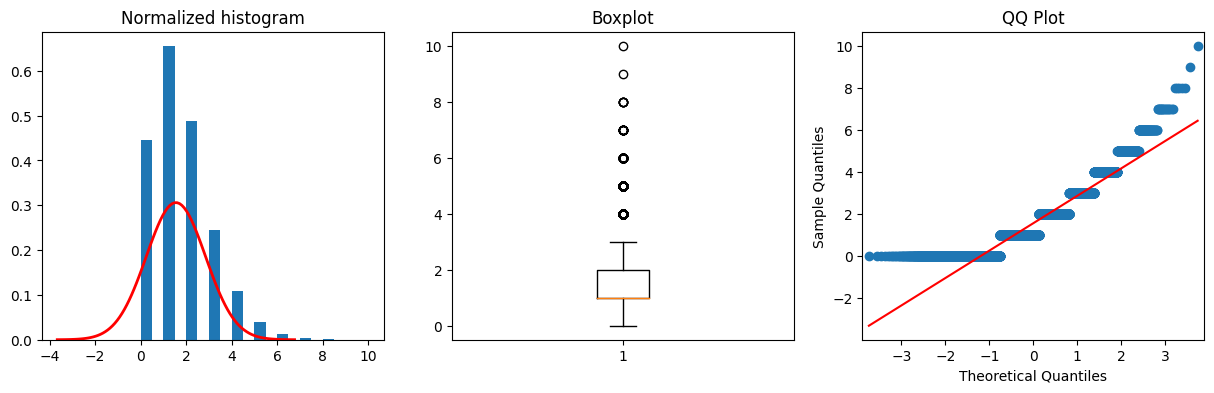

KS Statistic: 0.2146663963061371 	 p-value: 0.0
Does not look like a normal distribution.
Visitant goals normality test:


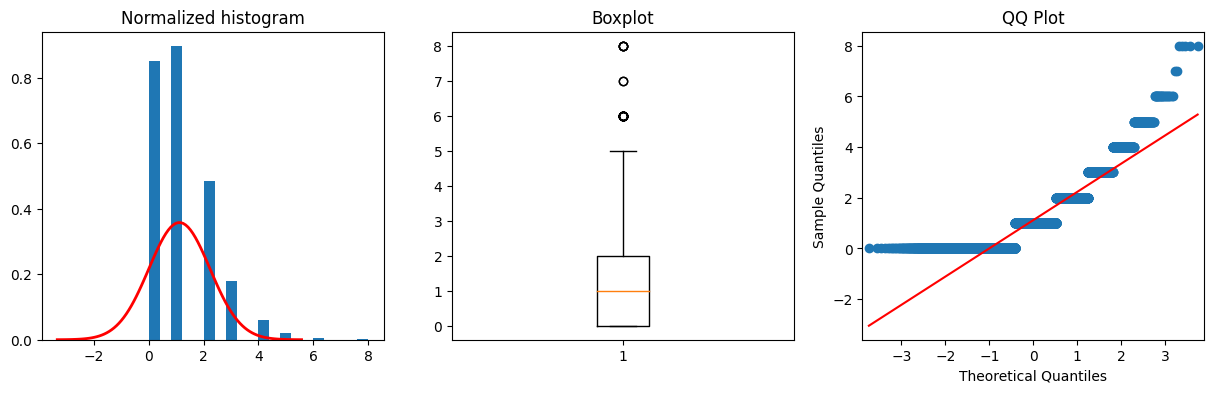

KS Statistic: 0.2412496633072242 	 p-value: 0.0
Does not look like a normal distribution.
There is a significant difference between the home goals and the away goals.
P-value: 8.584817120526911e-142 Wilcoxon test: 11185402.0
Teams score more goals at home matches.


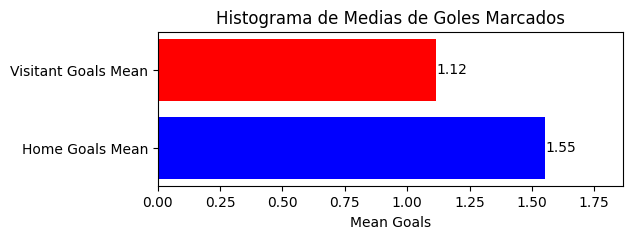

In [56]:
df = pd.read_csv('LaLiga_Matches.csv')

hg = df['FTHG']
vg = df['FTAG']

inference(hg,vg)

In [57]:


seasons = df['Season'].unique()


season_selector = widgets.Dropdown(
    options=seasons,
    description='Temporada:'
)

def season(season_selected):
    season_df = df[df['Season'] == season_selected]
    season_hg = season_df['FTHG']
    season_vg = season_df['FTAG']

    
    print("Temporada:", season_selected)
    print("Número de partidos:", len(season_df))
    
    inference(season_hg, season_vg)

widgets.interactive(
    season,
    season_selected=season_selector
)


interactive(children=(Dropdown(description='Temporada:', options=('1995-96', '1996-97', '1997-98', '1998-99', …